In [10]:
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from simulator.map_utils import create_regions
import matplotlib.pyplot as plt
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot

In [11]:
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [12]:
graph.network_polygon_bounds

[(0.0, 0.0),
 (0.0, 98.53143101823554),
 (95.58191009784183, 98.53143101823554),
 (95.58191009784183, 0.0),
 (0.0, 0.0)]

In [13]:
from numpy import random

In [27]:
scaling_factor = 10

# Prueba 1: todos HL5 femtoceldas, ningún HL4 macrocelda

[(0.0, 0.0), (0.0, 985.3143101823554), (955.8191009784183, 985.3143101823554), (955.8191009784183, 0.0), (0.0, 0.0)]


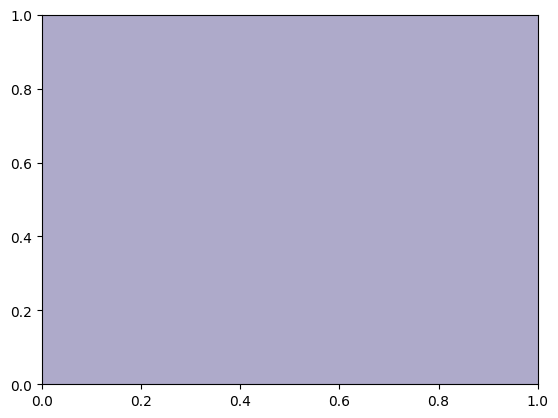

In [28]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 0.1))
        assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

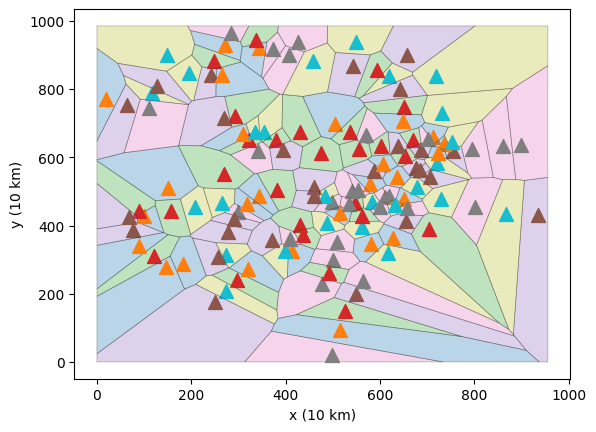

In [29]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker='^', s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()


# Prueba 2: ningún HL5 femtocelda y todas HL4 macroceldas

[(0.0, 0.0), (0.0, 985.3143101823554), (955.8191009784183, 985.3143101823554), (955.8191009784183, 0.0), (0.0, 0.0)]


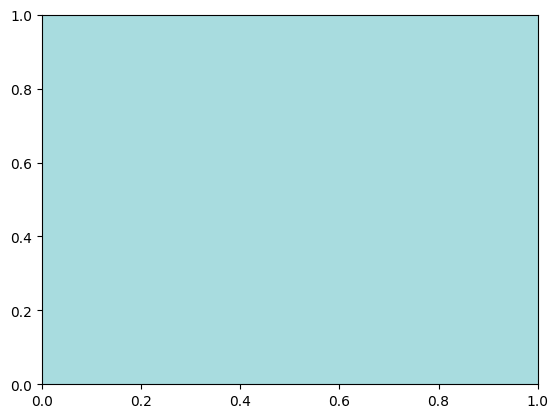

In [36]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL4":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 40))
        assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

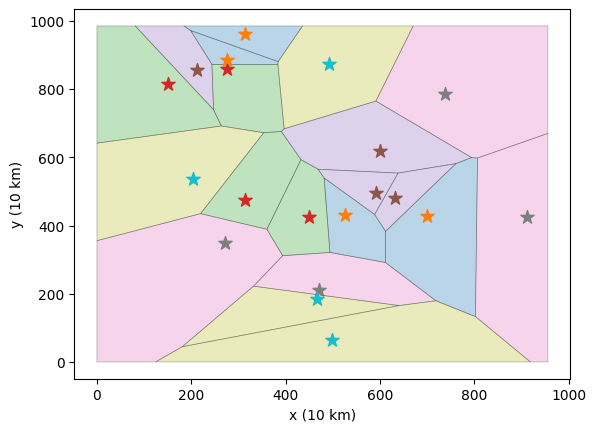

In [39]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    shape = "*" if node_assoc.type == "HL4" else "^"
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker=shape, s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()


# Prueba 3: todas HL5 femtoceldas y todas HL4 macroceldas

/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulatio

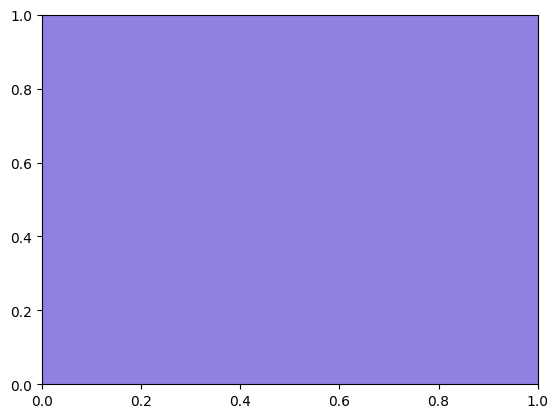

In [32]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 0.1))
    else:
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 40))
    assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

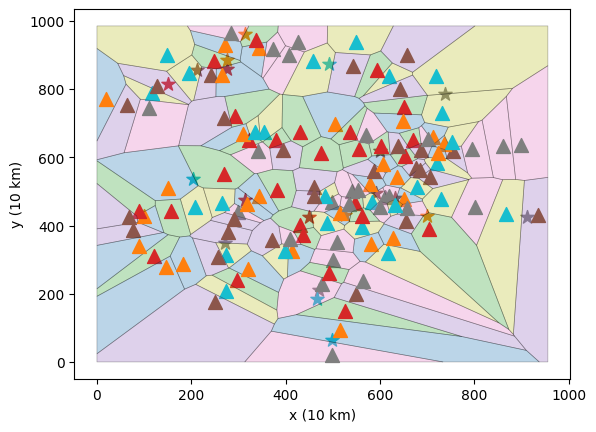

In [34]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    shape = "*" if node_assoc.type == "HL4" else "^"
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker=shape, s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()